# PHYS305 Computational Modelling Project: Demonstrating astrophysical problems with movement of multiple objects in gravitational fields by developing several celestial body models using Newtonian dynamics and Kepler’s laws of planetary motion.



In [5]:
# Strongly advise against running in CoCalc, better to run in an environment with less restrictions Eg// Spyder, Anaconda

# Preliminary Coding Ideas

In [6]:
# Library imports
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np7
import math
from mpl_toolkits import mplot3d
import turtle
from random import random

In [3]:
# Constants
G = 6.6743*(10**-11) # m3/kg/s2
c = 299792458. # m/s
Msun = 1.989*(10**30) # kg
eMass = 5.9722*(10**24) #kg {Singular Earth Mass} # for use to define later in the peliminary models

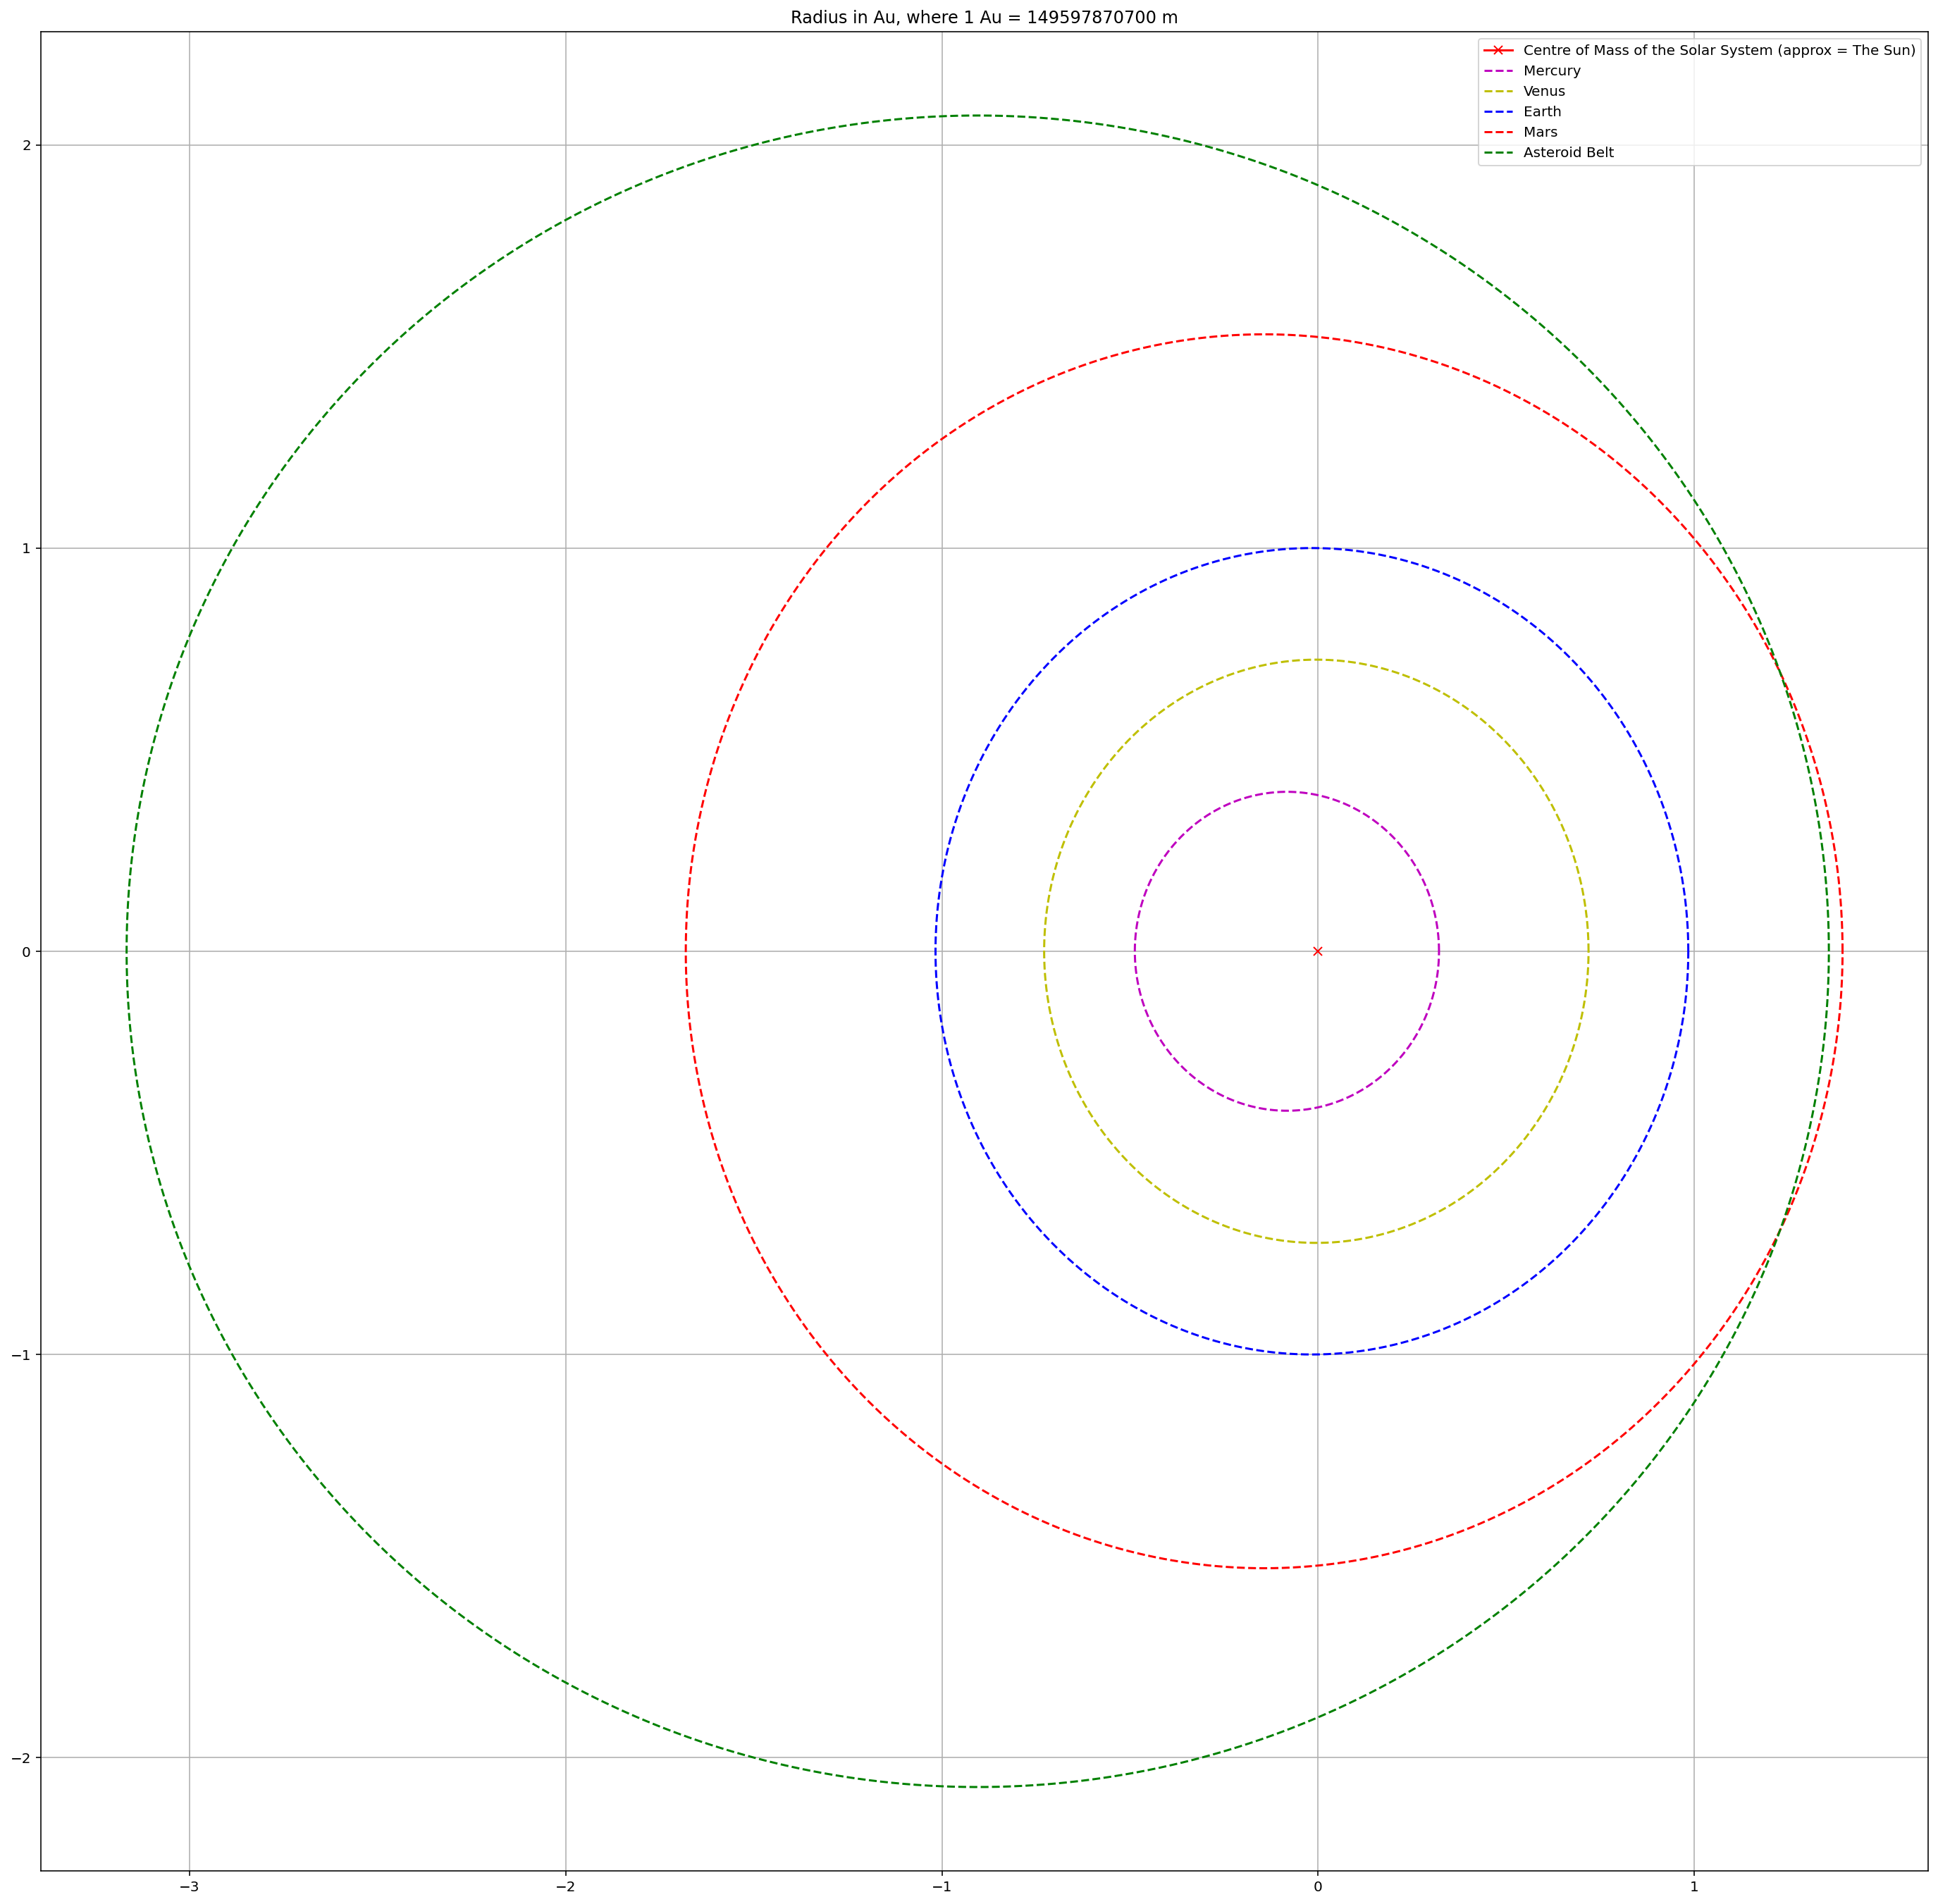

In [4]:
# So went back to basics and instead of trying to animate it right out the gates just made a plot of the most import orbits to actual scale, probably could be tided up a lot so working on that and adding the asteroid belts plus some random astronomical objects - M4 :)
#
theta = np.linspace(0,2*np.pi,8192)
#
class Vector(object):

    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y

    def setx(self, x): self._x = float(x)
    def sety(self, y): self._y = float(y)

    x = property(lambda self: float(self._x), setx)
    y = property(lambda self: float(self._y), sety)
#
class Body():

    def __init__(self,a,e,mass): #side note - {a is in AU which is why there's that massive number in the Period Calc as to convert to m, and mass is as a ratio of a singular Earth Mass}
        self._a = a
        self._e = e
        self._mass = mass

    @property
    def mass(self):
        """ Mass getter """
        return self._mass

    @property
    def a(self):
        """ Semi-Major axis getter """
        return self._a

    @property
    def e(self):
        """ Eccentricity getter """
        return self._e

    def Orbit(self):
        R = self._a / (1 + self._e * np.cos(theta))
        return R

    def Rmin(self):
        return self._a / (1 + self._e)

    def Rmax(self):
        return self._a / (1 - self._e)

    def Period(self):
        T = ( 2 * np.pi * (self._a * 149597870700)**(3/2) ) / np.sqrt( G * (self._mass + Msun ))
        return T / 86400

# List of Bodies and their Orbits
Mercury = Body(a = 0.38710, e = 0.2056, mass = 0.05*eMass)
Venus = Body(a = 0.72333, e = 0.0068, mass = 0.82*eMass)
Earth = Body(a = 1, e = 0.0167, mass = eMass)
Mars = Body(a = 1.52366, e = 0.0934, mass = 0.11*eMass)
# Asteroid Belt
m = (4/3 * np.pi * 500**3) * 3*10**3 # kg
trials = 1000
sigma = m / np.sqrt(trials)
asteroids = []
for i in range(trials):
    gaussian = np.random.normal(m, sigma)
    asteroids.append(gaussian)
Belt = Body(a = 1.9, e = 0.4, mass = 2.31*10**21/eMass)
# List of Bodies beyond the asteroid belt and their orbits
Jupiter = Body(a = 5.20336, e = 0.0484, mass = 317.9*eMass)
Saturn = Body(a = 9.53707, e = 0.0541, mass = 95.2*eMass)
Uranus = Body(a = 19.1913, e = 0.0472, mass = 14.5*eMass)
Neptune = Body(a = 30.0690, e = 0.0086, mass = 17.1*eMass)
# Extra Astronomical Bodies
Pluto = Body(a = 39.236, e = 0.2488, mass = 0.0022*eMass)
#

figure = plt.figure(figsize = (24, 24))
#
plt.plot(0,0, color = 'r', marker = 'x', label = 'Centre of Mass of the Solar System (approx = The Sun)') #Centre of the Solar System
plt.plot(Mercury.Orbit()*np.cos(theta),Mercury.Orbit()*np.sin(theta), color = 'm', linestyle = '--', label = 'Mercury') #Mercury
plt.plot(Venus.Orbit()*np.cos(theta),Venus.Orbit()*np.sin(theta), color = 'y', linestyle = '--', label = 'Venus') #Venus
plt.plot(Earth.Orbit()*np.cos(theta),Earth.Orbit()*np.sin(theta), color = 'b', linestyle = '--', label = 'Earth') #Earth
plt.plot(Mars.Orbit()*np.cos(theta),Mars.Orbit()*np.sin(theta), color = 'r', linestyle = '--', label = 'Mars') #Mars
#
plt.plot(Belt.Orbit()*np.cos(theta),Belt.Orbit()*np.sin(theta), color = 'g', linestyle = '--', label = 'Asteroid Belt') # Asteroid Belt
#
#plt.plot(Jupiter.Orbit()*np.cos(theta),Jupiter.Orbit()*np.sin(theta), color = 'g', linestyle = '--', label = 'Jupiter') #Jupiter
#plt.plot(Saturn.Orbit()*np.cos(theta),Saturn.Orbit()*np.sin(theta), color = 'y', linestyle = '--', label = 'Saturn') #Saturn
#plt.plot(Uranus.Orbit()*np.cos(theta),Uranus.Orbit()*np.sin(theta), color = 'b', linestyle = '--', label = 'Uranus') #Uranus
#plt.plot(Neptune.Orbit()*np.cos(theta),Neptune.Orbit()*np.sin(theta), color = 'c', linestyle = '--', label = 'Neptune') #Neptune
#
#plt.plot(Pluto.Orbit()*np.cos(theta),Pluto.Orbit()*np.sin(theta), color = 'm', linestyle = '--', label = 'Pluto') #Pluto
#
#
#
plt.title('Radius in Au, where 1 Au = 149597870700 m')
plt.legend()
plt.grid()
plt.show()
# not every line of code or definition is used at the moment but every line should have a purpose in the next and/or final version - M4
#this is looking good so far!!

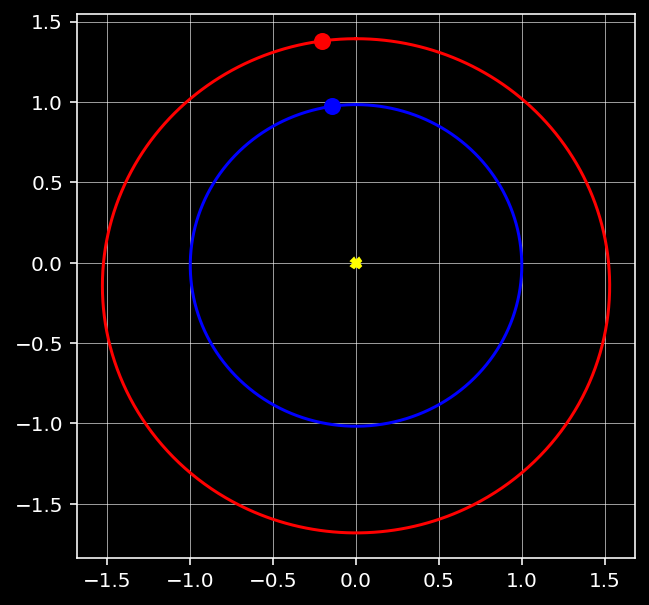

In [6]:
# from matplotlib.animation import PillowWriter
class Body2():

    def __init__(self,a,e,mass): #side note - {a is in AU which is why there's that massive number in the Period Calc as to convert to m, and mass is as a ratio of a singular Earth Mass}
        self._a = a
        self._e = e
        self._mass = mass

    @property
    def mass(self):
        """ Mass getter """
        return self._mass

    @property
    def a(self):
        """ Semi-Major axis getter """
        return self._a

    @property
    def e(self):
        """ Eccentricity getter """
        return self._e

    def Orbit2(self):
        R = self._a / (1 + self._e * np.cos(theta2))
        return R

    def Rmin(self):
        return self._a / (1 + self._e)

    def Rmax(self):
        return self._a / (1 - self._e)

    def Period(self):
        T = ( 2 * np.pi * (self._a * 149597870700)**(3/2) ) / np.sqrt( G * (self._mass + Msun ))
        return T / 86400
Mercury2 = Body2(a = 0.38710, e = 0.2056, mass = 0.05*eMass)
Venus2 = Body2(a = 0.72333, e = 0.0068, mass = 0.82*eMass) #eMass is earth masses
Earth2 = Body2(a = 1, e = 0.0167, mass = eMass)
Mars2 = Body2(a = 1.52366, e = 0.0934, mass = 0.11*eMass)
plt.style.use('dark_background')
theta2 = np.linspace(0,2*np.pi,1024)

x = Earth2.Orbit2()* np.sin(theta2)
y = Earth2.Orbit2()* np.cos(theta2)
x2 = Mars2.Orbit2()* np.sin(theta2)
y2 = Mars2.Orbit2()* np.cos(theta2)

fig, ax = plt.subplots(figsize=(5, 5))
earth, = ax.plot([], [], 'b.', markersize=15)
mars, = ax.plot([], [], 'r.', markersize=15)
ax.plot(0, 0, 'X', markersize=5, color="yellow")
plt.grid(True, lw=0.3)
ax.plot(x, y, 'b-')
ax.plot(x2, y2, 'r-')

def animate(i):
    earth.set_data(x[i], y[i])
    mars.set_data(x2[i], y2[i])
    return earth, mars

anim = FuncAnimation(fig, animate, frames=1000, interval=20, repeat=False)
anim.save('cirlce_ani.gif', writer='pillow')
plt.show()
# simple mars/earth animation, doesn't correctly reflect the time periods of each orbit

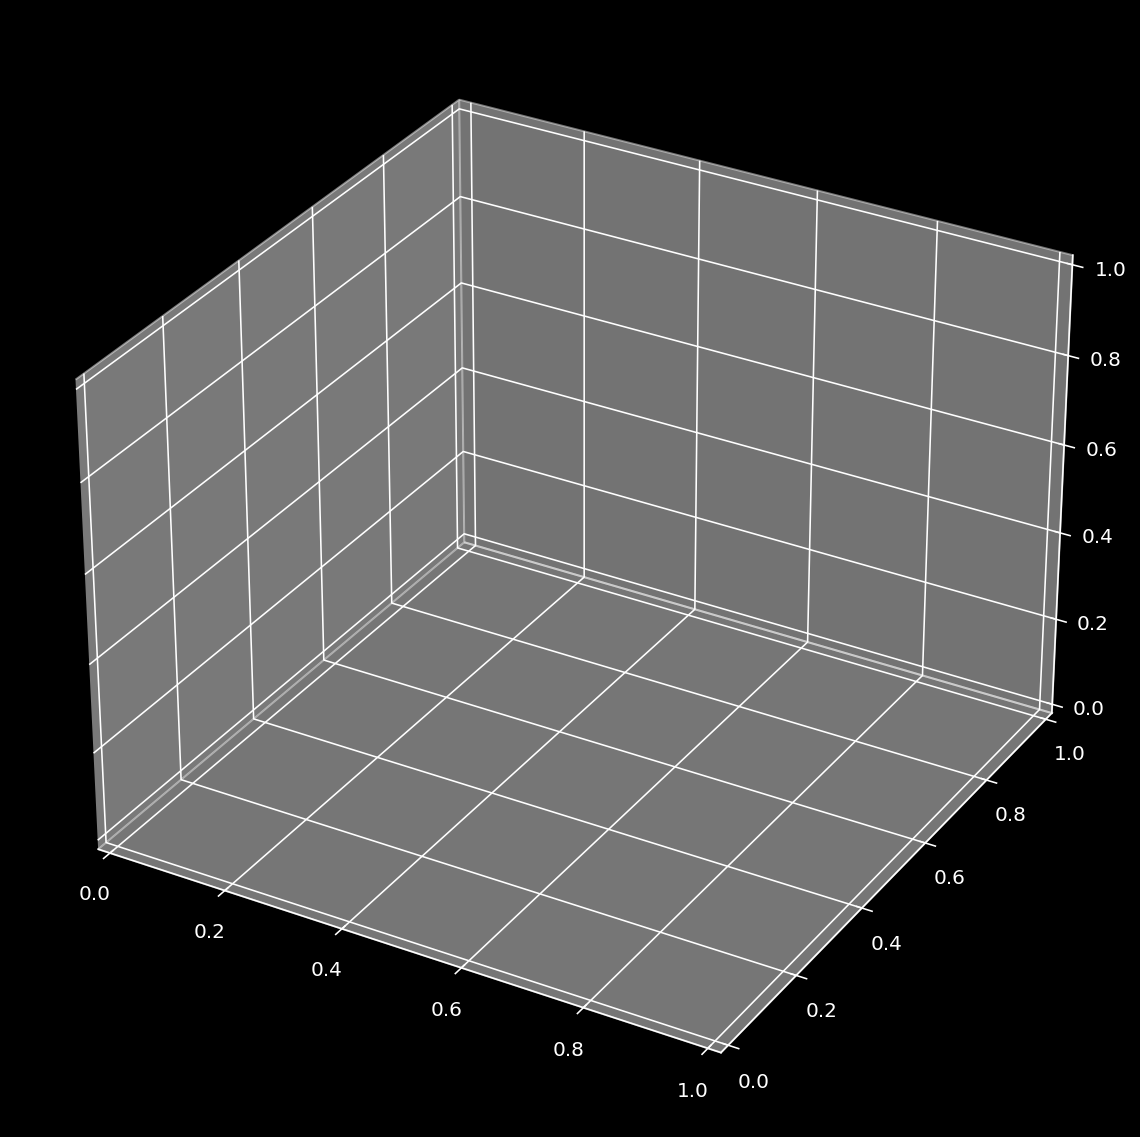

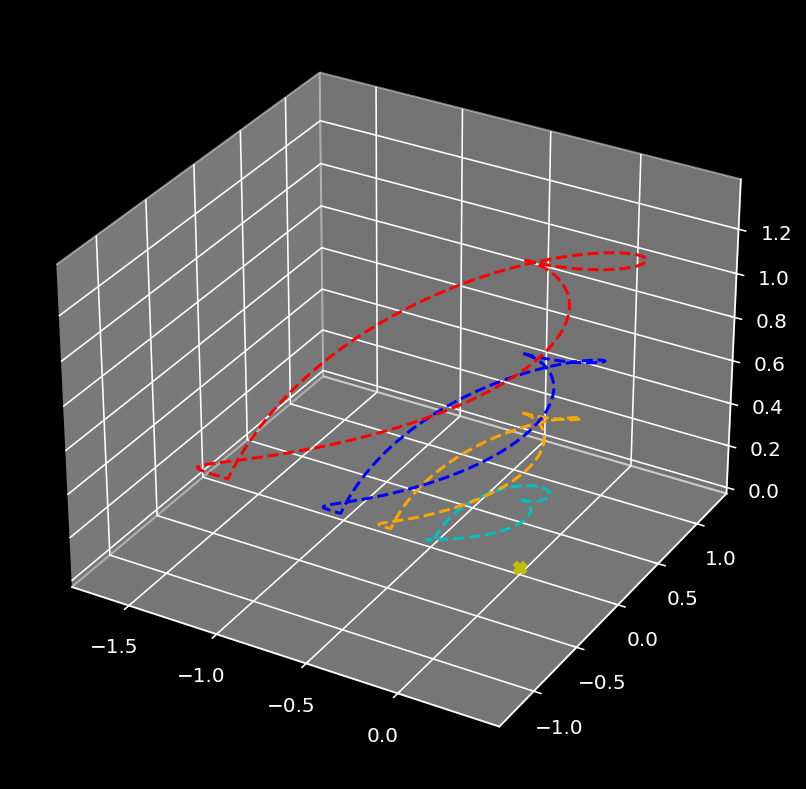

In [8]:
# first attempt at 3D plots - M4

c = 299792458. # m/s
Msun = 1.989*(10**30) # kg
G = 6.6743*(10**-11) # m^3 kg^-1 s^-2
eMass = 5.9722*(10**24) #kg {One Earth Mass}

#

theta = np.linspace(0,2*np.pi,8192) # Orbital angle
thi = np.linspace(0,np.pi,8192) # inclination angle

#

class Vector:
    def __init__(self, x=0.0, y=0.0, z=0.0):

        self.x = x
        self.y = y
        self.z = z

    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    def __str__(self):
        return f"{self.x}i + {self.y}j + {self.z}k"

    def __getitem__(self, item):
        if item == 0:
            return self.x

        elif item == 1:
            return self.y

        elif item == 2:
            return self.z

        else:
            raise IndexError("There are only three elements in the vector")

    def __add__(self, other):
        return Vector(
            self.x + other.x,
            self.y + other.y,
            self.z + other.z,
        )

    def __sub__(self, other):
        return Vector(
            self.x - other.x,
            self.y - other.y,
            self.z - other.z,
        )

    def __mul__(self, other):
        if isinstance(other, Vector):  # Vector dot product
            return (
                self.x * other.x
                + self.y * other.y
                + self.z * other.z
            )

        elif isinstance(other, (int, float)):  # Scalar multiplication
            return Vector(
                self.x * other,
                self.y * other,
                self.z * other,
            )

        else:
            raise TypeError("operand must be Vector, int, or float")

    def __truediv__(self, other):
        if isinstance(other, (int, float)):
            return Vector(
                self.x / other,
                self.y / other,
                self.z / other,
            )

        else:
            raise TypeError("operand must be int or float")

    def get_magnitude(self):
        return math.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)

    def normalize(self):
        magnitude = self.get_magnitude()
        return Vector(
            self.x / magnitude,
            self.y / magnitude,
            self.z / magnitude,
        )

#
class SolarSystem:
    def __init__(self, size):
        self.size = size
        self.bodies = []
        self.fig, self.ax = plt.subplots(
            1,
            1,
            subplot_kw={"projection": "3d"},
            figsize=(self.size / 50, self.size / 50),
        )
        self.fig.tight_layout()
    def add_body(self, body):
        self.bodies.append(body)

solar_system = SolarSystem(400)
plt.show()

class Body():

    def __init__(self,a,e,mass):
        self._a = a
        self._e = e
        self._mass = mass

    @property
    def mass(self):
        """ Mass getter """
        return self._mass

    @property
    def a(self):
        """ Semi-Major axis getter """
        return self._a

    @property
    def e(self):
        """ Eccentricity getter """
        return self._e

    def Orbit(self):
        R = self._a / (1 + self._e * np.cos(theta))
        return R

    def Rmin(self):
        return self._a / (1 + self._e)

    def Rmax(self):
        return self._a / (1 - self._e)

    def Period(self):
        T = ( 2 * np.pi * (self._a * 149597870700)**(3/2) ) / np.sqrt( G * (self._mass + Msun ))
        return T / 86400

#

    'List of Bodies and their Orbits'
'Inner Rocky Bodies'
Mercury = Body(a = 0.38710, e = 0.2056, mass = 0.05*eMass)
Venus = Body(a = 0.72333, e = 0.0068, mass = 0.82*eMass)
Earth = Body(a = 1, e = 0.0167, mass = eMass)
Mars = Body(a = 1.52366, e = 0.0934, mass = 0.11*eMass)
'Outer Gaseous Bodies'
Jupiter = Body(a = 5.20336, e = 0.0484, mass = 317.9*eMass)
Saturn = Body(a = 9.53707, e = 0.0541, mass = 95.2*eMass)
Uranus = Body(a = 19.1913, e = 0.0472, mass = 14.5*eMass)
Neptune = Body(a = 30.0690, e = 0.0086, mass = 17.1*eMass)
'Extra Astronomical Bodies'
Pluto = Body(a = 39.236, e = 0.2488, mass = 0.0022*eMass) # https://nssdc.gsfc.nasa.gov/planetary/factsheet/plutofact.html
PlanetX = Body(a = 460.0, e = 0.45, mass = 10*eMass)
Bodies = [Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto] # find better way of storing the bodies so they can be individually called upon when needed
# A: Dictionary??
#

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(0, 0, 0, color = 'y', marker = 'X')
ax.plot3D(Mercury.Orbit()*np.cos(theta)*np.sin(thi), Mercury.Orbit()*np.sin(theta)*np.sin(thi), np.abs(Mercury.Orbit()*np.cos(thi)), color = 'c', linestyle = '--')
ax.plot3D(Venus.Orbit()*np.cos(theta)*np.sin(thi), Venus.Orbit()*np.sin(theta)*np.sin(thi), np.abs(Venus.Orbit()*np.cos(thi)), color = 'orange', linestyle = '--')
ax.plot3D(Earth.Orbit()*np.cos(theta)*np.sin(thi), Earth.Orbit()*np.sin(theta)*np.sin(thi), np.abs(Earth.Orbit()*np.cos(thi)), color = 'b', linestyle = '--')
ax.plot3D(Mars.Orbit()*np.cos(theta)*np.sin(thi), Mars.Orbit()*np.sin(theta)*np.sin(thi), np.abs(Mars.Orbit()*np.cos(thi)), color = 'r', linestyle = '--')


plt.show()



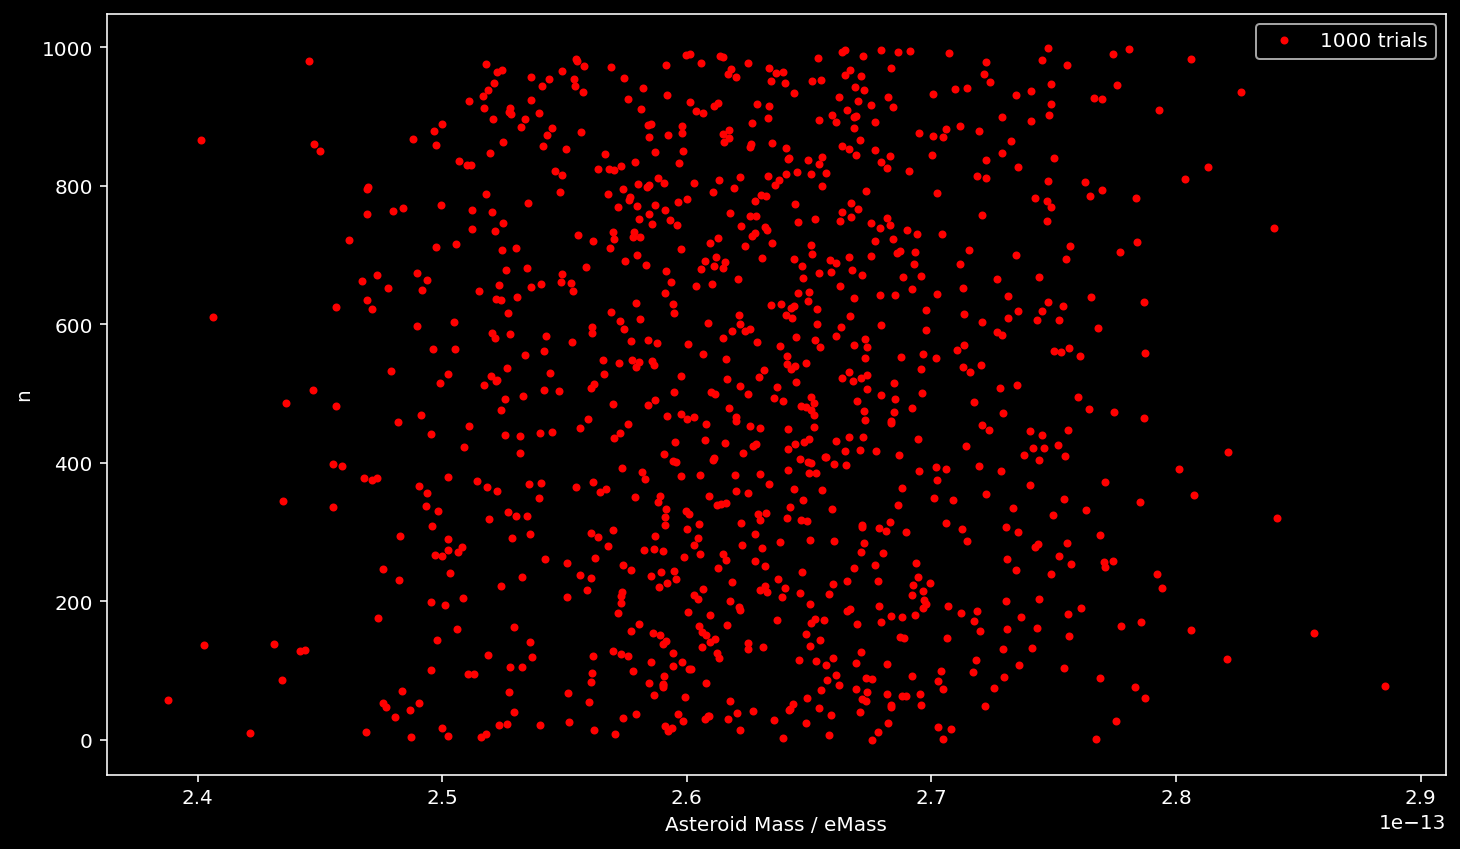

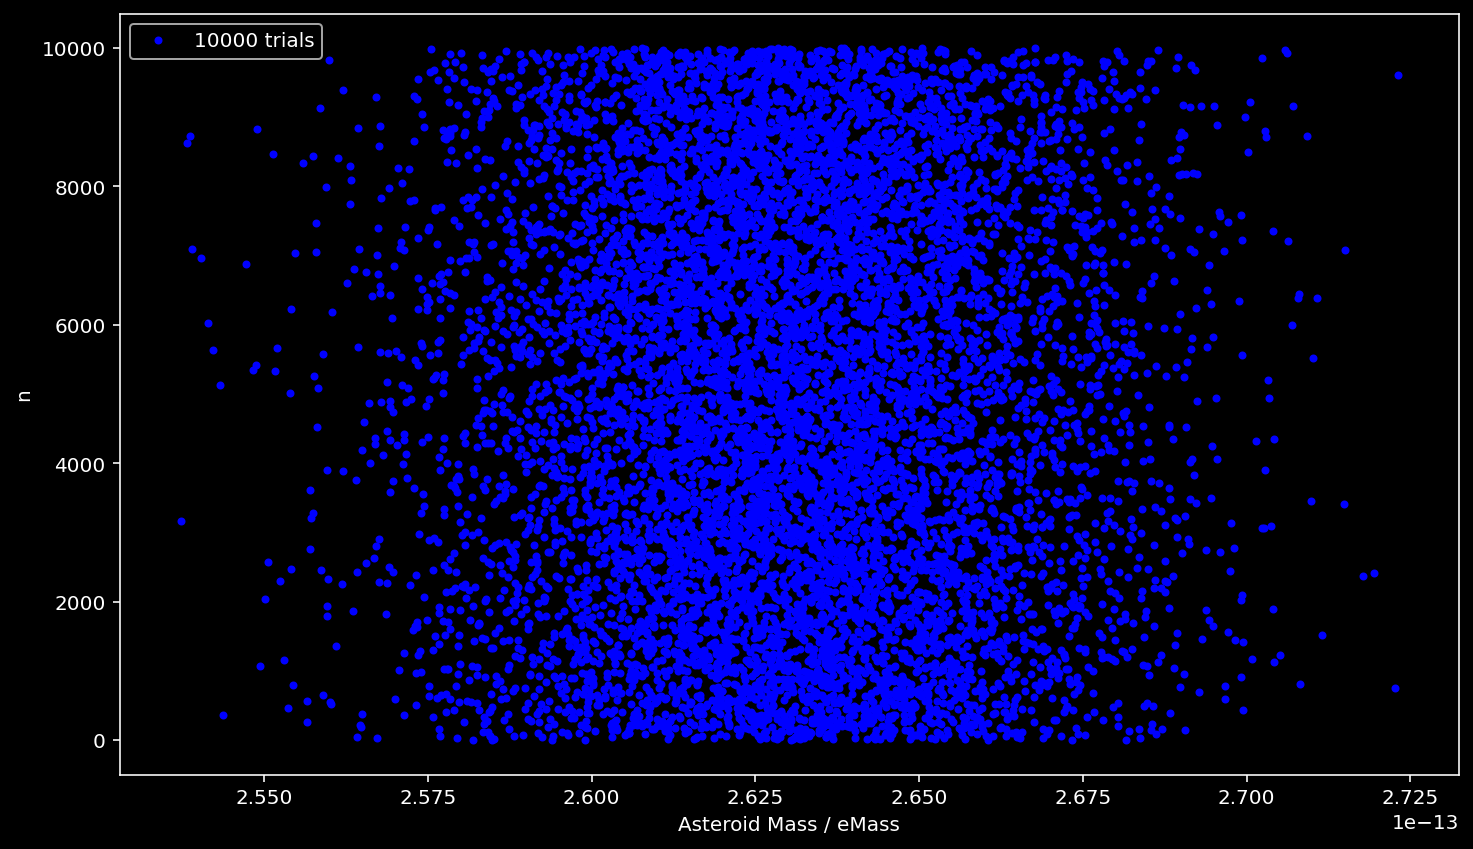

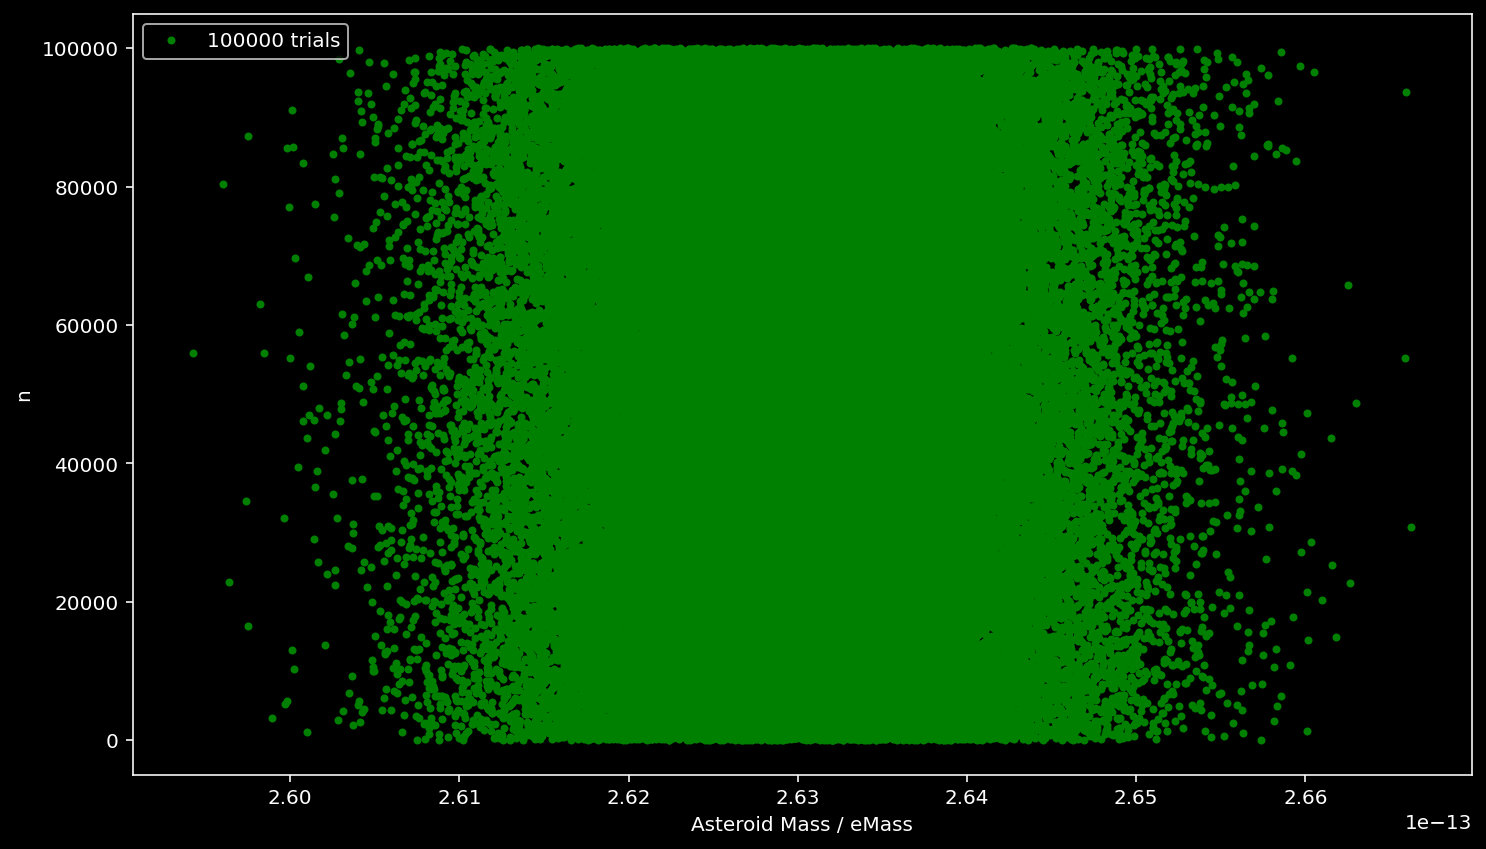

In [9]:
# asteroid random generation, start with a small amount of trials and work up if it works
# Find average mass from researched values
m = (4/3 * np.pi * 500**3) * 3*10**3 / (eMass) # kg

# Generate trials and find the sigma value per trial for each random dist.
trials = 1000
trials2 = 10000
trials3 = 100000
sigma = m / np.sqrt(trials)
sigma2 = m / np.sqrt(trials2)
sigma3 = m / np.sqrt(trials3)
asteroids = []
asteroids2 = []
asteroids3 = []
# For loops to generate random gaussian numbers around the calculated mean.
for i in range(trials):
    gaussian = np.random.normal(m, sigma)
    asteroids.append(gaussian)
for i in range(trials2):
    gaussian2 = np.random.normal(m, sigma2)
    asteroids2.append(gaussian2)
for i in range(trials3):
    gaussian3 = np.random.normal(m, sigma3)
    asteroids3.append(gaussian3)
#print(asteroids) #should print the array of masses

# Plot data
yarr = np.linspace(0,trials - 1,trials)
yarr2 = np.linspace(0,trials2 - 1,trials2)
yarr3 = np.linspace(0,trials3 - 1,trials3)

plt.plot(asteroids,yarr, linestyle = '', marker = '.', color = 'r', label = f'{trials} trials')
plt.xlabel("Asteroid Mass / eMass")
plt.ylabel("n")
plt.legend()
plt.show()
plt.plot(asteroids2,yarr2, linestyle = '', marker = '.', color = 'b', label = f'{trials2} trials')
plt.xlabel("Asteroid Mass / eMass")
plt.ylabel("n")
plt.legend()
plt.show()
plt.plot(asteroids3,yarr3, linestyle = '', marker = '.', color = 'g', label = f'{trials3} trials')
plt.xlabel("Asteroid Mass / eMass")
plt.ylabel("n")
plt.legend()
plt.show()

# Solar System Model

In [0]:
# same code as above but with the editted values to make it more realistic - M4
import turtle
import math

class SolarSystem:
    def __init__(self, width, height):
        self.thesun = None
        self.planets = []
        self.ssturtle = turtle.Turtle()
        self.ssturtle.hideturtle()
        self.ssscreen = turtle.Screen()
        self.ssscreen.setworldcoordinates(-width/2.0,-height/2.0,width/2.0,height/2.0)
        self.ssscreen.tracer(10)

    def addPlanet(self, aplanet):
        self.planets.append(aplanet)

    def addSun(self, asun):
        self.thesun = asun

    def showPlanets(self):
        for aplanet in self.planets:
            print(aplanet)

    def freeze(self):
        self.ssscreen.exitonclick()

    def movePlanets(self):
        G = 0.1
        dt = 0.1

        for p in self.planets:   
            p.moveTo(p.getXPos() + dt * p.getXVel(), p.getYPos() + dt * p.getYVel())

            rx = self.thesun.getXPos() - p.getXPos()
            ry = self.thesun.getYPos() - p.getYPos()
            r = math.sqrt(rx**2 + ry**2)

            accx = G * self.thesun.getMass()*rx/r**3
            accy = G * self.thesun.getMass()*ry/r**3

            p.setXVel(p.getXVel() + dt * accx)

            p.setYVel(p.getYVel() + dt * accy)
#stellar class to fetch star parameters
class Star:
    def __init__(self, iname, irad, im, itemp):
        self.name = iname
        self.radius = irad
        self.mass = im
        self.temp = itemp
        self.x = 0
        self.y = 0

        self.sturtle = turtle.Turtle()
        self.sturtle.shape("circle")
        self.sturtle.color("yellow")

    def getName(self):
        return self.name
    
    def getRadius(self):
        return self.radius

    def getMass(self):
        return self.mass

    def getTemperature(self):
        return self.temp
    
    def getVolume(self):
        v = 4.0/3 * math.pi * self.radius**3
        return v

    def getSurfaceArea(self):
        sa = 4.0 * math.pi * self.radius**2
        return sa

    def getDensity(self):
        d = self.mass / self.getVolume()
        return d

    def setName(self, newname):
        self.name = newname

    def __str__(self):
        return self.name

    def getXPos(self):
        return self.x

    def getYPos(self):
        return self.y
# body class to fetch all parameters
class Body:

    def __init__(self, iname, irad, im, idist, ivx, ivy, ic):    
        self.name = iname
        self.radius = irad
        self.mass = im
        self.distance = idist
        self.x = idist
        self.y = 0
        self.velx = ivx
        self.vely = ivy
        self.color = ic

        self.pturtle = turtle.Turtle()
        self.pturtle.up()
        self.pturtle.color(self.color)
        self.pturtle.shape("circle")
        self.pturtle.goto(self.x,self.y)
        self.pturtle.down()

    def getName(self):
        return self.name

    def getRadius(self):
        return self.radius

    def getMass(self):
        return self.mass

    def getDistance(self):
        return self.distance
 
    def getVolume(self):
        v = 4.0/3 * math.pi * self.radius**3
        return v

    def getSurfaceArea(self):
        sa = 4.0 * math.pi * self.radius**2
        return sa

    def getDensity(self):
        d = self.mass / self.getVolume()
        return d

    def setName(self, newname):
        self.name = newname

    def show(self):
        print(self.name)   `

    def __str__(self):
        return self.name

    def moveTo(self, newx, newy):
        self.x = newx
        self.y = newy
        self.pturtle.goto(newx, newy)

    def getXPos(self):
        return self.x

    def getYPos(self):
        return self.y

    def getXVel(self):
        return self.velx

    def getYVel(self):
        return self.vely

    def setXVel(self, newvx):
        self.velx = newvx

    def setYVel(self, newvy):
        self.vely = newvy


def createSSandAnimate():
    ss = SolarSystem(10000,10000)    

    sun = Star("SUN", 696340, 1.989*10**6, 5800)
    ss.addSun(sun)

#planets
    m = Body("MERCURY", 2439.5, 0.330, 57.9, 0, 47.4, "cyan")
    ss.addPlanet(m)
    
    m = Body("Venus", 6052, 4.87, 108.2, 0, 35.0, "orange")
    ss.addPlanet(m)
    
    m = Body("EARTH", 6378, 5.97, 149.6, 0, 29.8, "blue")
    ss.addPlanet(m)

    m = Body("MARS", 3396, 0.642, 228.0, 0, 24.1, "red")
    ss.addPlanet(m)

    m = Body("JUPITER", 71492, 1898, 778.5, 0, 13.1, "green")
    ss.addPlanet(m)

    m = Body("Saturn", 60268, 568, 1432.0, 0, 9.7, "magenta")
    ss.addPlanet(m)
    
    m = Body("Uranus", 25559, 86.8, 2867.0, 0, 6.8, "grey")
    ss.addPlanet(m)
    
    m = Body("Neptune", 24764, 102, 4515.0, 0, 5.4, "pink")
    ss.addPlanet(m)

    numTimePeriods = 20000
    for amove in range(numTimePeriods):
         ss.movePlanets()

    ss.freeze()

createSSandAnimate()

# Binary Star System

In [0]:
#
import turtle
import math
import numpy as np
#

#
class System:
    def __init__(self, width, height):
        
        self.bodies = []
        
        self.ssturtle = turtle.Turtle()
        self.ssturtle.hideturtle()
        self.ssscreen = turtle.Screen()
        self.ssscreen.setworldcoordinates( -width/2.0, -height/2.0, width/2.0, height/2.0)
        self.ssscreen.tracer(25)

    def addBody(self, Body):
        self.bodies.append(Body)

    def freeze(self):
        self.ssscreen.exitonclick()

    def moveBodies(self):
        G = 6.6743e-11
        dt = 0.1
    
        for i in range(len(self.bodies)):   
            self.bodies[i].moveTo(self.bodies[i].getXPos() + dt * self.bodies[i].getXVel(), self.bodies[i].getYPos() + dt * self.bodies[i].getYVel())
    
            rx1= self.bodies[0].getXPos() - self.bodies[1].getXPos() 
            ry1= self.bodies[0].getYPos() - self.bodies[1].getYPos()
            
            rx2 = self.bodies[1].getXPos() - self.bodies[0].getXPos()
            ry2 = self.bodies[1].getYPos() - self.bodies[0].getYPos()
    
            r1 = math.sqrt(rx1**2 + ry1**2)
            r2 = math.sqrt(rx2**2 + ry2**2)
    
            accx1 = - G * self.bodies[1].getMass() * rx1/r1**3
            accy1 = - G * self.bodies[1].getMass() * ry1/r1**3
            
            accx2 = - G * self.bodies[0].getMass() * rx2/r2**3
            accy2 = - G * self.bodies[0].getMass() * ry2/r2**3
    
            self.bodies[0].setXVel(self.bodies[0].getXVel() + dt * accx1)
            self.bodies[0].setYVel(self.bodies[0].getYVel() + dt * accy1)
            
            self.bodies[1].setXVel(self.bodies[1].getXVel() + dt * accx2)
            self.bodies[1].setYVel(self.bodies[1].getYVel() + dt * accy2)

class Body:
    def __init__(self, iname, irad, im, ix, iy, ivx, ivy, ic):
        
        self.name = iname
        self.radius = irad
        self.mass = im
        self.x = ix
        self.y = iy
        self.velx = ivx
        self.vely = ivy
        self.color = ic
        
        self.bturtle = turtle.Turtle()
        self.bturtle.up()
        self.bturtle.shape("circle")
        self.bturtle.color(self.color)
        self.bturtle.goto(self.x, self.y)
        self.bturtle.down()
    
    def getRadius(self):
        return self.radius

    def getMass(self):
        return self.mass

    def getVolume(self):
        v = 4.0/3 * np.pi * self.radius**3
        return v

    def getSurfaceArea(self):
        sa = 4.0 * np.pi * self.radius**2
        return sa

    def getDensity(self):
        dens = self.mass / self.getVolume()
        return dens

    def setName(self, newname):
        self.name = newname

    def __str__(self):
        return self.name

    def getXPos(self):
        return self.x

    def getYPos(self):
        return self.y
    
    def moveTo(self, newx, newy):
        self.x = newx
        self.y = newy
        self.bturtle.goto(newx, newy)
        
    def getXVel(self):
        return self.velx

    def getYVel(self):
        return self.vely

    def setXVel(self, newvx):
        self.velx = newvx

    def setYVel(self, newvy):
        self.vely = newvy
#turtle creates and animates the stars below with the defined parameters
def createSSandAnimate():
    ss = System(8e10,8e10)    

    malfoy = Body("SagAstar", 1.23e10, 8.26*10**36, 4.8e9, 0, 0, 2e6, "orange")
    ss.addBody(malfoy)

    Sun = Body("Helios", 6.96e8, 1.989*10**30, -3.2e10, 0, 2.5e6, -8e7, "yellow") 
    ss.addBody(Sun)

#number of steps to move in
    n = 1000000
    for amove in range(n):
         ss.moveBodies()

    ss.freeze()
    
createSSandAnimate()

# Trinary Star System \- Adaptation from solar and binary model



In [0]:
#
class System:
    def __init__(self, width, height):
        
        self.bodies = []
        
        self.ssturtle = turtle.Turtle()
        self.ssturtle.hideturtle()
        self.ssscreen = turtle.Screen()
        self.ssscreen.setworldcoordinates( -width/2.0, -height/2.0, width/2.0, height/2.0)
        self.ssscreen.tracer(25)

    def addBody(self, Body):
        self.bodies.append(Body)

    def freeze(self):
        self.ssscreen.exitonclick()

    def moveBodies(self):
        G = 0.01
        dt = 0.0001

        body1 = len(self.bodies)
        for body1 in self.bodies:
            body1.moveTo(body1.getXPos() + dt * body1.getXVel(), body1.getYPos() + dt * body1.getYVel())
            for bodyn in self.bodies:
                if body1 != bodyn: # Dont process the body interating with itself
                    rx= body1.getXPos() - bodyn.getXPos()
                    ry= body1.getYPos() - bodyn.getYPos()
                    r = math.sqrt(rx**2 + ry**2)

                    accx = - G * bodyn.getMass() * body1.getMass() * rx/r**3
                    accy = - G * bodyn.getMass() * body1.getMass() * ry/r**3

                    body1.setXVel(body1.getXVel() + dt * accx)
                    body1.setYVel(body1.getYVel() + dt * accy)

class Body:
    def __init__(self, iname, irad, im, ix, iy, ivx, ivy, ic):
        
        self.name = iname
        self.radius = irad
        self.mass = im
        self.x = ix
        self.y = iy
        self.velx = ivx
        self.vely = ivy
        self.color = ic
        
        self.bturtle = turtle.Turtle()
        self.bturtle.up()
        self.bturtle.shape("circle")
        self.bturtle.color(self.color)
        self.bturtle.goto(self.x, self.y)
        self.bturtle.down()
    
    def getRadius(self):
        return self.radius

    def getMass(self):
        return self.mass

    def getVolume(self):
        v = 4.0/3 * np.pi * self.radius**3
        return v

    def getSurfaceArea(self):
        sa = 4.0 * np.pi * self.radius**2
        return sa

    def getDensity(self):
        dens = self.mass / self.getVolume()
        return dens

    def setName(self, newname):
        self.name = newname

    def __str__(self):
        return self.name

    def getXPos(self):
        return self.x

    def getYPos(self):
        return self.y
    
    def moveTo(self, newx, newy):
        self.x = newx
        self.y = newy
        self.bturtle.goto(newx, newy)
        
    def getXVel(self):
        return self.velx

    def getYVel(self):
        return self.vely

    def setXVel(self, newvx):
        self.velx = newvx

    def setYVel(self, newvy):
        self.vely = newvy
        
def createSSandAnimate():
    ss = System(3200,3200)    

    malfoy = Body("Malfoy", 169000, 8.26*10**6, 800, 0, -256, -3400, "orange")
    ss.addBody(malfoy)

    Sun = Body("Helios", 696340, 1.989*10**6, -700, 0, -350, -3200, "yellow") # these masses have been reudced by 10**24
    ss.addBody(Sun)

    Polaris = Body('Polaris', 756340, 1*10**6, 200, 0, 900, 2300, "blue")
    ss.addBody(Polaris)

    n = 1000000
    for amove in range(n):
         ss.moveBodies()

    ss.freeze()

createSSandAnimate()

# Working Trinary Model with N\-Body Code



In [0]:
#the class which creates our blank canvas for the bodies in our system to be added to.
class SolarSystem:
    def __init__(self, width, height, G=5, dt=5):
        self.bodies = []
        self.ssturtle = turtle.Turtle()
        self.ssturtle.hideturtle()
        self.ssscreen = turtle.Screen()
        self.ssscreen.setworldcoordinates(-width/2.0,-height/2.0,width/2.0,height/2.0)
        self.ssscreen.tracer(50)
        self.G = G
        self.dt = dt
        
    def addBody(self, body):
        self.bodies.append(body)

    def showPlanets(self):
        for body in self.bodies:
            print(body)
#freeze stops the TypeError.
    def freeze(self):
        self.ssscreen.exitonclick()

    def moveBodies(self):
        G = self.G
        dt = self.dt
         
        for body1 in self.bodies:
            body1.moveTo(body1.getXPos() + dt * body1.getXVel(), body1.getYPos() + dt * body1.getYVel())
            for body2 in self.bodies:
                if body1 != body2:
                    rx= body1.getXPos() - body2.getXPos()
                    ry= body1.getYPos() - body2.getYPos()
                    r = math.sqrt(rx**2 + ry**2)

                    #anti ping r value that resets the value of the radius to stop acceleration from being too big.
                    if r<10:
                        r=99999


                    #F = (m1 * m2)/d^2
                    f = -G * (body2.getMass() * body1.getMass()) / (r**2)

                    #a = f/m
                    accx = (f * rx/r)/body1.getMass()
                    accy = (f * ry/r)/body1.getMass()

                    #Acculmilate all interactive forces for body1
                    body1.setXVel(body1.getXVel() + dt * accx)
                    body1.setYVel(body1.getYVel() + dt * accy)
        
class Body:
    def __init__(self, iname, irad, im, ix, iy, ivx, ivy, ic):
        self.name = iname
        self.radius = irad
        self.mass = im
        self.x = ix
        self.y = iy
        self.velx = ivx
        self.vely = ivy
        self.color = ic
        
        self.pturtle = turtle.Turtle()
        self.pturtle.shape("circle")
        self.pturtle.color(self.color)
        self.pturtle.up()
        self.pturtle.goto(self.x,self.y)
        self.pturtle.down()
        
    def getName(self):
        return self.name
    
    def getRadius(self):
        return self.radius

    def getMass(self):
        return self.mass
    
    def getSurfaceArea(self):
        sa = 4.0 * math.pi * self.radius**2
        return sa

    def getDensity(self):
        d = self.mass / self.getVolume()
        return d

    def setName(self, newname):
        self.name = newname

    def __str__(self):
        return self.name

    def getXPos(self):
        return self.x

    def getYPos(self):
        return self.y

    def getXVel(self):
        return self.velx

    def getYVel(self):
        return self.vely

    def setXVel(self, newvx):
        self.velx = newvx

    def setYVel(self, newvy):
        self.vely = newvy
    
    def moveTo(self, newx, newy):
        self.x = newx
        self.y = newy
        self.pturtle.goto(newx, newy)

def createSSandAnimate():
    wsize=3200

# Below this True statement is the Trinary star system code that works better than the previous one which is an extention of the Binary System.
    if True: #if True then does the Trinary, if you replace with False then it does the 100 star system
        ss = SolarSystem(wsize,wsize,3*10**2 ,0.0001)

        BodyList=[
        ["Malfoy", 169000, 8.26*10**6, 800, 0, -256, -400, "orange"],
        ["Helios", 696340, 1.989*10**6, -700, 0, -350, -200, "yellow"],
        ['Polaris', 756340, 1*10**6, 200, 0, 900, 300, "blue"]]

        for b in BodyList:
            body = Body(b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7])
            ss.addBody(body)
# Below is the NBody system code that runs when the 'if True' statement is changed to 'if False'
    else:
        ss = SolarSystem(wsize,wsize,50,5)
        numberofbodies = 100
        #give Main Star given a big mass to keep things centered
        ss.addBody(Body('Main',1,numberofbodies ,0,0,0,0,"red"))

        for i in range(numberofbodies-1):
            #Random Initial Velicity - Prevents too many "pings"
            body = Body(iname='', irad= 1, im=1,ix=wsize*(random()-0.5), iy=wsize*(random()-0.5), ivx=0.2*(random()-0.5),ivy=0.2*(random()-0.5),ic="orange")
            # Start at Rest
            # body = Body(iname='', irad= 1, im=1,ix=2000*(random()-0.5), iy=2000*(random()-0.5), ivx=0,ivy=0,ic="orange")
            ss.addBody(body)
    
   
    numTimePeriods = 10000
    for amove in range(numTimePeriods):
         ss.moveBodies()

#this shows us what the final positions and velocities are, makes it easier to find where bugs are and makes it so we can comment on the values and how realistic they are in the report.
    print('Final State')
    for b in ss.bodies:
        print(f"x {b.x} y {b.y} velx {b.velx} vely {b.vely}")
    ss.freeze()

createSSandAnimate()

# Gravitational Deflection and Stable Orbit Models



In [4]:
"""
Constants
---------
"""

c = 299792458. # speed of light in a vacuum {m/s}
G = 6.6743e-11   # gravitational constant
Msun = 1.989e30 # one solar mass
    
"""
Start of Working Code
---------------------
"""

class Mass:
    
    """
    Parameters:
    -----------
    Mass: - Mass of the Object you'd like to visualise (default = one solar mass which is the sun)
    Radius: - Radius of the Object you'd like to visualise, not used too much by useful for some of the produced graphics (default = 1.0)
    Position(x,y,z): - (default = {0,0,0})
    """
        
    def __init__(self, mass = Msun, radius = 1.0, x = 0., y = 0., z = 0.):
        
        self._mrxyz = np.zeros(5)
        self._m = mass
        self._r = radius
        self._x = x
        self._y = y
        self._z = z
        
    @property
    def mass(self):
        return self._mrxyz[0]
    @mass.setter
    def mass(self, value):
        self._mrxyz[0] = value
        
    @property
    def radius(self):
        return self._mrxyz[1]
    @radius.setter
    def radius(self, value):
        self._mrxyz[1] = value
        
    @property
    def x(self):
        return self._mrxyz[2]
    @x.setter
    def x(self, value):
        self._mrxyz[2] = value

    @property
    def y(self):
        return self._mrxyz[3]
    @y.setter
    def y(self, value):
        self._mrxyz[3] = value

    @property
    def z(self):
        return self._mrxyz[4]
    @z.setter
    def z(self, value):
        self._mrxyz[4] = value
    
    # Definitions of relavent equations and variables needed in later steps.
    
    def __str__(self):
        output = f"Body with mass = {self._m:.3e} kg\nand a radius of {self._r:.3e}"
        output += f"(x,y,z) = ({self._x:.2e}m, {self._y:.2e}m, {self._z:.2e}m)\n"
        return output
    
    def R_schwarzchild(self):
        """
        this calculates the schwarzschild radius of the object.
        """
    
        rs = 2 * G * self._m / c**2
        return rs
    
    def R_isco(self):
        """
        this calculates the inner most stbale orbit around the massive object.
        """
            
        r_isco = 6 * G * self._m / c**2 
        return r_isco

    def potential(self,x, y):
        
        r = np.sqrt(x**2 + y**2)
        return - G * self._m / r**2
    
    def metric_tensor(self, x, y):
        """
        Calculates the Schwarzschild metric around a spherically symmetric body, which you specified at the beginning of the class.
        """
    
        r = np.sqrt(x**2 + y**2)
        g_11 = - 1 + 2 * G * self._m / (r * c**2) # c^2 dt^2
        g_22 = 1 - 2 * G * self._m / (r * c**2) # dr^2
        return g_11, g_22
    
    def crit_Radius(self):
        """
        This function tells you whether the body you have is or isnt a blackhole by using the schwarzchild radius for its classification.
        """
    
        if self._r <= Mass.R_schwarzchild(self):
            print(f"This object, with {self._m:.3e} kg of mass and a radius of {(self._r):.3e} m, is a blackhole as has collapsed beyond its Schwarzchild Radius of {Mass.R_schwarzchild(self):.3e}")
        elif self._r <= Mass.R_isco(self):
            print(f"This object is not yet a blackhole but will be when compressed to a radius of ~{Mass.R_schwarzchild(self):.3e}")

    def R_ISCO_plot(self):
        
        """
        this function plots the inner most stable orbital sphere, the schwarzschild sphere and also the proton sphere
        """
        # Creates linspaces and a 3D meshgrid for which the different spheres are plotted upon
        thi = np.linspace(0, 2*np.pi)
        theta = np.linspace(0, np.pi)
        THETA, THI = np.meshgrid(theta, thi)
        
        # Calculates the objects Photon Sphere, which is represents the inner most stable circular orbit of a massless particle.
        R_ph = 3*G*self._m/(c**2) # {The inner most stable orbit for photons}
        
        # Converts the spherical coordinates to cartesian for all 4 spherical sizes, so they can be plotted using Matplotlib.pyplot
        xr = self._r * np.sin(THETA) * np.cos(THI)
        yr = self._r * np.sin(THETA) * np.sin(THI)
        zr = self._r * np.cos(THETA)

        x = Mass.R_schwarzchild(self) * np.sin(THETA) * np.cos(THI)
        y = Mass.R_schwarzchild(self) * np.sin(THETA) * np.sin(THI)
        z = Mass.R_schwarzchild(self) * np.cos(THETA)

        xx = Mass.R_isco(self) * np.sin(THETA) * np.cos(THI)
        yy = Mass.R_isco(self) * np.sin(THETA) * np.sin(THI)
        zz = Mass.R_isco(self) * np.cos(THETA)

        xxx = R_ph * np.sin(THETA) * np.cos(THI)
        yyy = R_ph * np.sin(THETA) * np.sin(THI)
        zzz = R_ph * np.cos(THETA)

        # - start of the plot stuff below - 
            
        fig = plt.figure(figsize=(10, 8))
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')

        ax1.set_title(f'An object of Mass = {self._m:.3e} and its Photon, I.S.C.O,\nSchwarzschild and Actual Size plots')
        ax1.set_xlabel('x {m}')
        ax1.set_ylabel('y {m}')
        ax1.set_zlabel('z {m}')
        ax1.plot_wireframe(x, y, z, color = 'red', alpha=0.48, label = 'The Schwarzschild Radius') # This plots the Schwarzschild radius of the Mass
        ax1.plot_wireframe(xx, yy, zz, color = 'grey', alpha=0.32, label = 'Inner Most stable Orbital Sphere') # This plots the Inner Most Stable Orbital Sphere
        ax1.plot_wireframe(xxx, yyy, zzz, color = 'blue', alpha=0.16, label = 'Photon Sphere') # This plots the PHOTON SPHERE
        ax1.plot_wireframe(xr, yr, zr, color = 'green', alpha=0.2, label = 'Actual size of the body')
        ax1.legend(loc = 'upper left')
        
        ax2.set_title(f'An object of Mass = {self._m:.3e} and its\nPhoton, I.S.C.O and Schwarzschild spherical plots')
        ax2.set_xlabel('x {m}')
        ax2.set_ylabel('y {m}')
        ax2.set_zlabel('z {m}')
        ax2.plot_wireframe(x, y, z, color = 'red', alpha=0.48, label = 'The Schwarzschild Radius') # This plots the Schwarzschild radius of the Mass
        ax2.plot_wireframe(xx, yy, zz, color = 'grey', alpha=0.32, label = 'Inner Most stable Orbital Sphere') # This plots the Inner Most Stable Orbital Sphere
        ax2.plot_wireframe(xxx, yyy, zzz, color = 'blue', alpha=0.16, label = 'Photon Sphere') # This plots the PHOTON SPHERE
        
    def mass_deflection_plot2D(self, x0, y0, res, tot_time, dt = 0.1, angle = 3/2, s = 0.01):
        
        """
        Plots the deflection of an object traveling near the given massive object in 2D.
        This also plots additional infomation such as the relation of distance to velocity and also distance from the massive object over time plot.
        
        Parameters:
        -----------
    
        x0:-  The initial x-position of the object in meters.
        y0:-  The initial y-position of the object in meters.
        res:-  The resolution of the plot (default 4e9).
        tot_time:-  The total time in seconds for which the object is observed.
        dt:-  The time interval in seconds for which the object is observed (default = 0.1).
        angle:-  The angle of the object's trajectory in radians (default = 3/2).
        s:-  The fraction of the speed of light (default = 0.01 = 1% of c)
        """
        
        self._xstart = x0
        self._ystart = y0
        self._t = tot_time
        self._dt = dt
        self._a = angle # angle of trajectory
        self._s = s
        self._res = res # resolution of plot {1.5x to 4x}
        
        # Creates a circle respreenting the size of the inital Object
        theta = np.linspace(0,2*np.pi)
        rx = self._r * np.cos(theta)
        ry = self._r * np.sin(theta)
   
        # Calculate the number of simulation steps and create an array of times for the simulation
        steps = self._t / self._dt
        time = np.arange(0,self._t,self._dt)
        
        # Calculates the initial velocity parameters of a moving object
        ang = (self._a) * np.pi # angle at which the object travels {currently set to be perpendicular to fixed point}
        v0 = self._s*c # {m/s} speed of said object in terms of c
        
        vX0 = v0 * np.cos(ang)
        vY0 = v0 * np.sin(ang)
        
        # Create arrays to store the object's position and velocity
        Xpos = [self._xstart]
        Ypos = [self._ystart]

        Xvel = [vX0]
        Yvel = [vY0]

        # Creates a list to store the distance of an object from the massive object at each time step      
        dist_list = []
        
        # Simulates the motion of the object using a for loop
        for j in range(len(time)):
            # Calculate the distance of the object from the massive object at this time step
            rr = np.sqrt(Xpos[j]**2 + Ypos[j]**2)
            dist_list.append(rr)
            
            # Checks if the object has 'collided' with the massive object
            if rr <= self._r:
                term = 0.0
                Xvel.append(term)
                Yvel.append(term)
                Xpos.append(term)
                Ypos.append(term)
                break
            else:
                accx = - G * self._m * Xpos[j] / rr**3
                accy = - G * self._m * Ypos[j] / rr**3
                
                vxnew = Xvel[j] + accx * self._dt
                vynew = Yvel[j] + accy * self._dt
                
                Xvel.append(vxnew)
                Yvel.append(vynew)
                
                Xnew = Xpos[j] + Xvel[j+1] * self._dt
                Ynew = Ypos[j] + Yvel[j+1] * self._dt
                
                Xpos.append(Xnew)
                Ypos.append(Ynew)
            
        # Calculates the Velocity magnitude and stores them in a list for later display
        MagVel = []
        for i in range(len(Xvel) - 1):
            magvel = np.sqrt(Xvel[i]**2 + Yvel[i]**2)
            MagVel.append(magvel)
        
        # Creates multiple plots displaying all the calculated infomation

        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6),
                                 gridspec_kw={'width_ratios': [3, 1, 1], 'wspace': 0.35})
        
       
        axs[0].plot(Xpos, Ypos, marker = '', linestyle =':', color = 'b')
        axs[0].plot(rx,ry, color = 'grey', marker = '', linestyle = '--', label = f'Size of Massive object {self._m:.3e}')
        axs[0].plot(x0,y0, color = 'black', marker = 'x', linestyle = '', label = f'Initial (x,y) = ({self._xstart:.2e},{self._ystart:.2e})')
        axs[0].set_title(f'Position over Time\nmoving at {v0} m/s\n')
        axs[0].set_xlabel('{m}')
        axs[0].set_ylabel('{m}')
        axs[0].set_xlim([-self._res, self._res])
        axs[0].set_ylim([-self._res, self._res])
        axs[0].legend(loc = 'upper left')
        axs[0].set_aspect('equal')
        
        axs[1].plot(dist_list, MagVel, color = 'r')
        axs[1].set_title('Distance to Velocity Relation\n\n')
        axs[1].set_xlabel('\nDistance from Loci {m}')
        axs[1].set_ylabel('\nVelocity (m/s)')
        
        axs[2].plot(time, dist_list, color = 'green')
        axs[2].axhline(y = self._r, color = 'grey', linestyle = '--', label = f'Objects Radius\n= {self._r:.3e}')
        axs[2].set_xlabel('\nTime {s}')
        axs[2].set_ylabel('Distance {m}')
        axs[2].set_title('Distance to Time Plot\n')

        
    def mass_deflection_plot3D(self, x0, y0, z0, res, tot_time, dt = 0.1, percentof_c = 0.2, angle1 = 3/2, angle2 = 1/2, view_ang = 45, view_hieght = 35):
               
        """
        Plots the deflection of an object traveling near the given massive object in 3D.
        Also plots the Innermost Stable Circular Orbit of the Mass
        
        Parameters:
        -----------
    
        x0:-  The initial x-position of the object in meters.
        y0:-  The initial y-position of the object in meters.
        z0:- The initial z-position of the object in meters.
        res:-  The resolution of the plot (default 4e9).
        tot_time:-  The total time in seconds for which the object is observed.
        dt:-  The time interval in seconds for which the object is observed (default = 0.1).
        angle1:-  The angle of the object's trajectory about the z-axis in radians (default = 3/2).
        angle2:- The inclination to the z-axis in radians (default = 1/2).
        percentof_c:-  The fraction of the speed of light (default = 0.01 = 1% of c).
        view_ang:- the rotation about the z axis in which youre viewing the plot (default = 45).
        view_height:- the height in which youre viewing the plot (default = 35).
        """
         
        self._xstart = x0
        self._ystart = y0
        self._zstart = z0
        self._s = percentof_c # fraction of the speed of light
        self._a1 = angle1 # rotational angle in xy
        self._a2 = angle2 # inclination angle
        self._t = tot_time
        self._dt = dt
        self._res = res # Resolution of the plot {1.5 to 4 times the initial position is recommended dependant on speed}
        self._vh = view_hieght
        self._va = view_ang
        
        # Creates two angle linspaces and a meshgrid to be used to plot the R_isco of the object
        thi = np.linspace(0, 2*np.pi)
        theta = np.linspace(0, np.pi)
        THETA, THI = np.meshgrid(theta, thi)
        
        # Converts spherical coords to cartesian to be plotted
        xx = Mass.R_isco(self) * np.sin(THETA) * np.cos(THI)
        yy = Mass.R_isco(self) * np.sin(THETA) * np.sin(THI)
        zz = Mass.R_isco(self) * np.cos(THETA)
    
        steps = self._t / self._dt
        time = np.arange(0,self._t,self._dt)
    
        v0 = self._s*c # {m/s} speed of said object in terms of c
        
        ang1 = (self._a1) * np.pi # angle at which the object travels {currently set to be perpendicular to fixed point}
        ang2 = (self._a2) * np.pi
        
        Xpos = [self._xstart]
        Ypos = [self._ystart]
        Zpos = [self._zstart]
        
        vX0 = v0 * np.sin(ang2) * np.cos(ang1)
        vY0 = v0 * np.sin(ang2) * np.sin(ang1)
        vZ0 = v0 * np.cos(ang2)
        
        Xvel = [vX0]
        Yvel = [vY0]
        Zvel = [vZ0]
        
        for i in range(int(steps)):
            rr = np.sqrt(Xpos[i]**2 + Ypos[i]**2 + Zpos[i]**2)
            if rr <= Mass.R_schwarzchild(self):
                Xpos.append(0.0)
                Ypos.append(0.0)
                Zpos.append(0.0)
                Xvel.append(0.0)
                Yvel.append(0.0)
                Zvel.append(0.0)
                break
            else:
                accx = - G * self._m * Xpos[i] / rr**3
                accy = - G * self._m * Ypos[i] / rr**3
                accz = - G * self._m * Zpos[i] / rr**3
                
                vxnew = Xvel[i] + accx * dt
                vynew = Yvel[i] + accy * dt
                vznew = Zvel[i] + accz * dt
                
                Xvel.append(vxnew)
                Yvel.append(vynew)
                Zvel.append(vznew)
                
                Xnew = Xpos[i] + Xvel[i+1] * dt
                Ynew = Ypos[i] + Yvel[i+1] * dt
                Znew = Zpos[i] + Zvel[i+1] * dt
                
                Xpos.append(Xnew)
                Ypos.append(Ynew)
                Zpos.append(Znew)
            
        # - Start of Plotting Jargon -
        
        fig = plt.figure()
        ax = plt.figure().add_subplot(projection='3d')
        
        ax.plot(self._xstart, self._ystart, self._zstart, linestyle ='', marker = 'x', color = 'black', label = f'Initial Pos = ({self._xstart:.2e},{self._ystart:.2e},{self._zstart:.2e})m\nInitial Velocity = {v0:.3e}m/s')
        ax.plot(Xpos,Ypos,Zpos, linestyle = ':', color = 'r', label = f'The path of a body moving at {self._s:.3e} of c')
        ax.plot_wireframe(xx, yy, zz, color = 'grey', alpha=0.32, label = 'Inner Most stable Orbital Sphere') # This plots the Inner Most Stable Orbital Sphere
        ax.set_title(f'Inner most Stable Orbit of a\nMassive Astronomical Orbit of Mass = {self._m:.3e}')
        ax.set_xlabel('x {m}')
        ax.set_ylabel('y {m}')
        ax.set_zlabel('z {m}')
        ax.set_xlim(-self._res, self._res)    
        ax.set_ylim(-self._res, self._res)
        ax.set_zlim(-self._res, self._res)
        ax.view_init(elev=self._vh, azim=self._va)
        ax.legend(loc = 'upper left')

    def Grav2D_in3D_wTrack(self, percentof_c = 0.5, init_angle = 1/2, x0 = 1.0, y0 = 1.0, tot_time = 10000, time_int = 0.1, res = 1.0, view_ang = 45, view_hieght = 35):
        """
        this plots the 2D (x and y) deflection as a 3D render. On top of also plotting the massive objects 2D gravity field as described by the schwarzschild metric, where the z axis is the matrix element

        Parameters
        ----------
        x0:-  The initial x-position of the object in meters.
        y0:-  The initial y-position of the object in meters.
        z0:-  Not a physical quantity but can be adjusted if needed to make the graphic more visible (default set to 1).
        res:-  The resolution of the plot (default 4e9).
        tot_time:-  The total time in seconds for which the object is observed (default = 10000).
        time_int:-  The time interval in seconds for which the object is observed (default = 0.1).
        init_angle:-  The angle of the object's trajectory about the z-axis in radians (default = 1/2).
        percentof_c:-  The fraction of the speed of light (default = 0.5 = 50% of c).
        view_ang:- the rotation about the z axis in which youre viewing the plot (default = 45).
        view_height:- the height in which youre viewing the plot (default = 35).

        """
        self._s = percentof_c
        self._a = init_angle
        self._x0 = x0
        self._y0 = y0
        self._t = tot_time
        self._dt = time_int
        self._res = res
        self._vh = view_hieght
        self._va = view_ang

            # {this below creates the grid mesh} - M4
            
        x = np.linspace(-self._res, self._res, 100)
        y = np.linspace(-self._res, self._res, 100)
        X, Y = np.meshgrid(x, y)
        
            # {This calculates the metric tensor for each point on the grid above} - M4
        
        G_11, G_22 = Mass.metric_tensor(self, X, Y)
        
            # - Particle Trajectory -
        
        v0 = self._s*c # {m/s} speed of said object in terms of c
        
        ang = (self._a)*np.pi # angle at which the object travels {currently set to be perpendicular to fixed point}
        
        steps = self._t / self._dt
        
        Xpos = [self._x0]
        Ypos = [self._y0]
        
        vX0 = v0 * np.cos(ang)
        vY0 = v0 * np.sin(ang)
        
        Xvel = [vX0]
        Yvel = [vY0]
        
        for i in range(int(steps)):
            rr = np.sqrt((self._x - Xpos[i])**2 + (self._y - Ypos[i])**2)
            if rr <= Mass.R_schwarzchild(self):
                term = 0.0
                Xvel.append(term)
                Yvel.append(term)
                Xpos.append(term)
                Ypos.append(term)
            else:
                accx = - G * self._m * Xpos[i] / rr**3
                accy = - G * self._m * Ypos[i] / rr**3
                
                vxnew = Xvel[i] + accx * self._dt
                vynew = Yvel[i] + accy * self._dt
                
                Xvel.append(vxnew)
                Yvel.append(vynew)
                
                Xnew = Xpos[i] + Xvel[i+1] * self._dt
                Ynew = Ypos[i] + Yvel[i+1] * self._dt
                
                Xpos.append(Xnew)
                Ypos.append(Ynew)
        
              # start of the plot stuff below
              
        fig = plt.figure()
        ax = plt.figure().add_subplot(projection='3d')
        
            # {You can swap between the two below for a different representation} - M4
            
        #ax.plot_surface(X, Y, G_11, cmap = 'coolwarm', antialiased=True, alpha=0.72)
        ax.plot_surface(X, Y, G_22, cmap = 'coolwarm', antialiased=True, alpha=0.36)
        
        ax.plot(Xpos, Ypos, 1.0, color = 'black', linestyle = ':') # particle trajectory line
        ax.plot(self._x0, self._y0, 1.0, color = 'black', marker = 'x', label = f'Initial Position ({self._x0:.2e},{self._y0:.2e})m', linestyle = '')
        
        ax.set_xlabel('x {m}')
        ax.set_ylabel('y {m}')
        ax.set_zlabel('g_22')
        ax.set_title(f'2D Grav Field embedded in 3D of mass = {self._m:.3e} kg\nwith an object moving at {v0/c} x the speed of light\n')
        ax.view_init(elev=self._vh, azim=self._va) # {mess with this if you want to change the viewing angle} - M4
        ax.legend(loc ='upper left')
        
        ax.set_xlim(-self._res, self._res)    
        ax.set_ylim(-self._res, self._res)
        #ax.set_zlim(0, 1)
        
        ax.set_box_aspect((12.0,12.0,16.0)) # Can change the aspect ratio of the plot

In [5]:
"Below are commands you can use to replicate some of the visuals and graphs in the report, a lot of these cannot be ran on cocalc as they require more RAM and CPU than cocalc offers"
"Advise to unhash and hash one at a time unless you have access to a powerful system this could overload the RAM and CPU"
sun = Mass(mass = 1.989e30, radius = 6.957e8)

#print(sun.crit_Radius())
#print(sun.R_ISCO_plot())

print(sun.mass_deflection_plot2D(x0 = 6.4e9, y0 = -3.6e9, res = 1.5e10, tot_time = 400000, dt = 0.1, angle = 2/2, s = 0.00044))
#print(sun.mass_deflection_plot3D(x0 = 4.0e10, y0 = -4.0e10, z0 = -1.0e9, res = 8e10, tot_time = 100000, dt = 0.1, percentof_c = 0.001, angle1 = 1/2, angle2 = 1/2, view_ang = 45, view_hieght = 30))
#print(sun.Grav2D_in3D_wTrack(percentof_c = 0.0002, init_angle = 2/2, x0 = 2.25e10, tot_time = 640000, time_int = 0.1, y0 = -2.25e10, res = 4e10, view_hieght = 90, view_ang = 45))

SagAstar = uc.Mass(mass = 8.26e36, radius = 1.226801676e10)

#print(SagAstar.R_ISCO_plot())
#print(SagAstar.mass_deflection_plot3D(x0=6.5e10,y0=7.5e10,z0=-2.5e10,res=8e10, tot_time=100000, percentof_c=0.42, view_hieght=30, view_ang = 0, angle1=1/2, angle2=3/2))
#print(SagAstar.mass_deflection_plot2D(x0 =2.4e11, y0 = -3.2e11, res = 4e11, tot_time = 100000, dt = 0.1, angle = 1.2/2, s = 0.16))

W492 = Mass(mass = 4.9725e32, radius = 3.8465253e10) # Westerhout 49-2's average mass
W492u = Mass(mass = 7.3593e32, radius = 3.8465253e10) # "               " upper mass limit
W492l = Mass(mass = 2.5857e32, radius = 3.8465253e10) # "               " lower mass limit

#print(W492.crit_Radius())
#print(W492l.R_ISCO_plot())

BigBoi = Mass(mass = 2.875e36, radius = 6.957e10)

#print(BigBoi.mass_deflection_plot2D(angle = 3/2, upper_limit = 0.25, lower_limit = 0.0001, ds = 0.0001, x0 = 2e9, y0 = -2e9, res = 4e9, tot_time = 10000, dt = 0.1))
#print(BigBoi.mass_deflection_plot3D(angle1 = 1/4, angle2 = 3/2, percentof_c = 0.15, x0 = 2.0e10, y0 = -1.8e10, z0 = -2.1e10, res = 2.4e10, tot_time = 100000, dt = 0.1, view_ang = 85, view_hieght = 25))
#print(BigBoi.Grav2D_in3D_wTrack(percentof_c = 0.32, init_angle = 3/2, x0 = -7.2e8, y0 = 6.4e8, tot_time = 100000, time_int = 0.1, res = 1e9, view_hieght = 35, view_ang = 45))
#print(BigBoi.R_ISCO_plot())